# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [58]:
# Import relevant libraries
from splinter import Browser
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [59]:
# Due to software environments issues, this is only way to run splinter on my  computer.
# Set the chromeDriver path
chromedriver_path = '/usr/local/bin/chromedriver'

# Configure Chrome options
options = Options()
options.headless = True  # use headless mode

# Set up ChromeDriver service
service = ChromeService(executable_path=chromedriver_path)

# Open a Chrome window using Splinter
browser = Browser('chrome', options=options, service=service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

> **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.

In [60]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [61]:
# Scrape the website
html = browser.html

# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [11]:
# Extract all rows of data
table_contents = soup.find('table', class_='table')
rows = table_contents.find_all('tr', class_='data-row')
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [12]:
# Create an empty list
table_list = []
# Loop through the scraped data to create a list of rows
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    table_list.append(cols)

In [14]:
# Define the column names based on the table headers
headers = [header.text.strip() for header in table_contents.find_all('th')]

# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(table_list, columns=headers)

In [15]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [77]:
# Bonus: Method 2: Use pd.read_html to get table data
df2 = pd.read_html(url)

# Select the Mars weather table data
mars_weather_table = df2[0]

mars_weather_table

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [78]:
# Check the Data types
mars_weather_table.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [79]:
# Convert the table types
mars_weather_table = (
    mars_weather_table
    .assign(terrestrial_date = pd.to_datetime(mars_weather_table['terrestrial_date']))
    .astype({
        'id':'object'
    })
)
mars_weather_table.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

> **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [16]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [17]:
# Change data types for data analysis
df = (df
      .assign(terrestrial_date=pd.to_datetime(df.terrestrial_date))  # Convert the `terrestrial_date` column to datetime type.
      .astype({
        'sol':'int',
        'ls':'int',
        'month':'int',
        'min_temp':'float',
        'pressure':'float'
        })
      )
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
* Find the average the minimum daily temperature for all of the months.
* Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
* Find the average the daily atmospheric pressure of all the months.
* Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
* Consider how many days elapse on Earth in the time that Mars circles the Sun once.
* Visually estimate the result by plotting the daily minimum temperature.


In [24]:
# 1. How many months are there on Mars?
cnt_months = (
    df['month']
    .value_counts()
    .sort_index(ascending=True)
)

print(cnt_months)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [27]:
# 2. How many Martian days' worth of data are there?
cnt_mars_day = df['id'].count()
print(cnt_mars_day)

1867


In [31]:
# 3. What is the average low temperature by month?
avg_low_temp = (
    df.groupby('month')['min_temp']
    .mean()
    .sort_index(ascending=True)
)
print(avg_low_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [70]:
# set white background
plt.style.use('default')

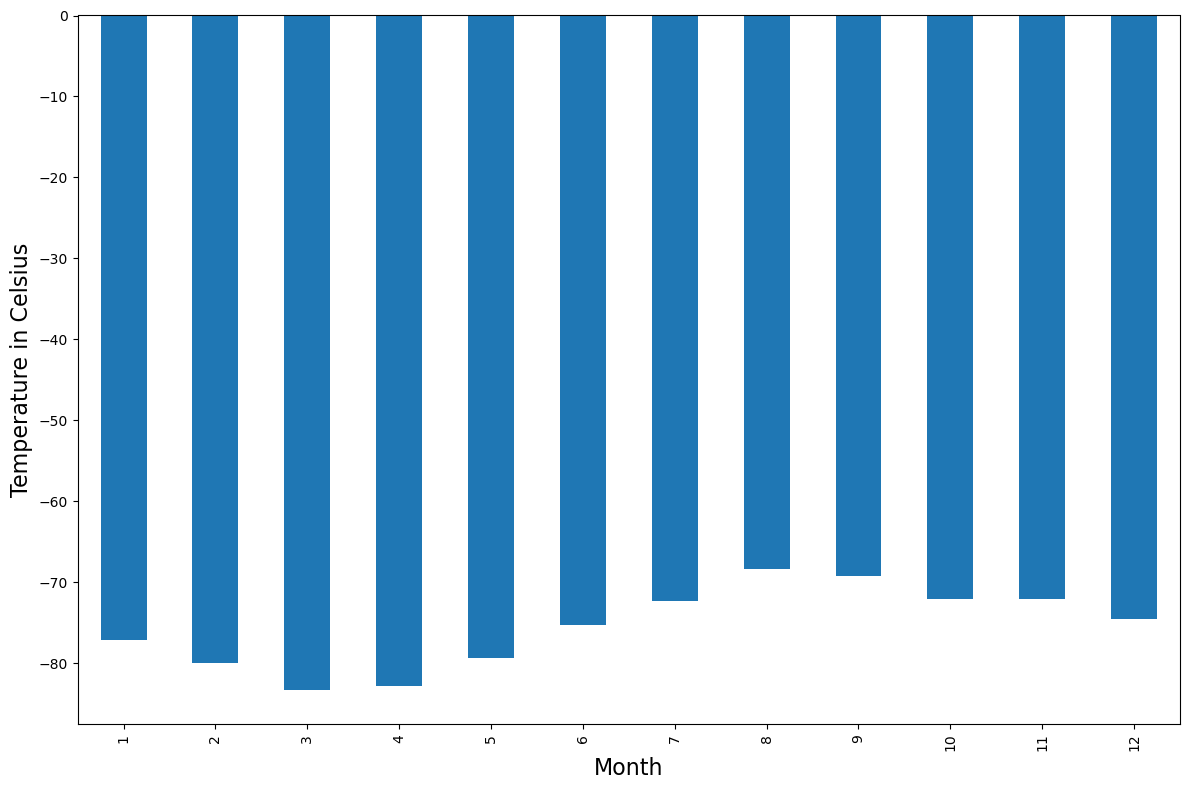

In [71]:
# Plot the results as a bar chart
plt.figure(figsize=(12, 8))
# sns.barplot(x='month', y='min_temp', data=df)
avg_low_temp.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Temperature in Celsius', fontsize=16)
plt.tight_layout()
plt.savefig('./Outputs/avg_low_temp(unsorted_version).png')
plt.show()

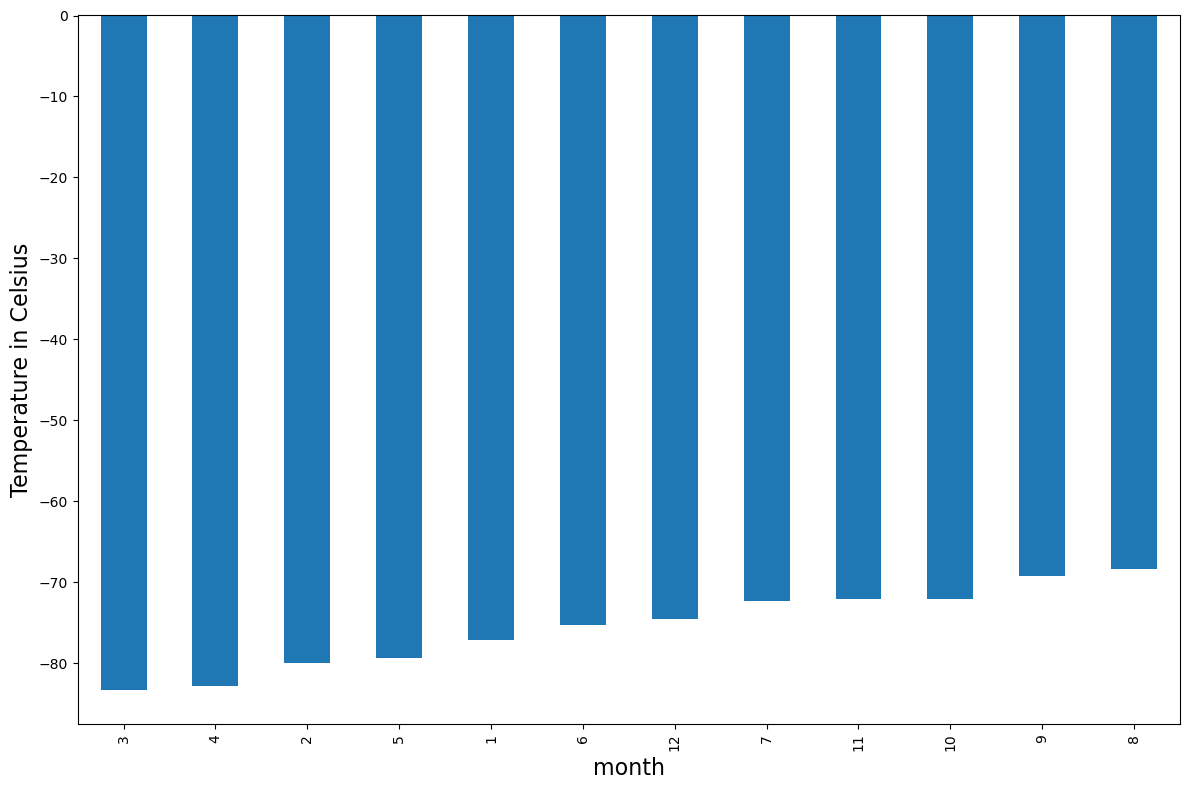

In [104]:
# Identify the coldest and hottest months in Curiosity's location
# Calculate the average low temperature by month and sort the values
avg_low_temp_sorted = (
    df.groupby('month')['min_temp']
    .mean()
    .sort_values(ascending=True)
)

# plot
plt.figure(figsize=(12, 8))
avg_low_temp_sorted.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('month', fontsize=16)
plt.ylabel('Temperature in Celsius', fontsize=16)
plt.tight_layout()
plt.savefig('./Outputs/avg_low_temp(sorted_version).png')
plt.show()

#### Observation & Analysis

This temperature distribution shows the temperature variations on Mars during different months of the year.

- The **coldest months** are March and April, with the average minimum temperatures in these months being the lowest on the chart.

- The **warmest month** is August, with the average minimum temperatures in this month being the highest on the chart.

In [43]:
# 4. Average pressure by Martian month
avg_pressure_mars = (
    df.groupby('month')['pressure']
    .mean()
    .sort_index(ascending=True)
)
print(avg_pressure_mars)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


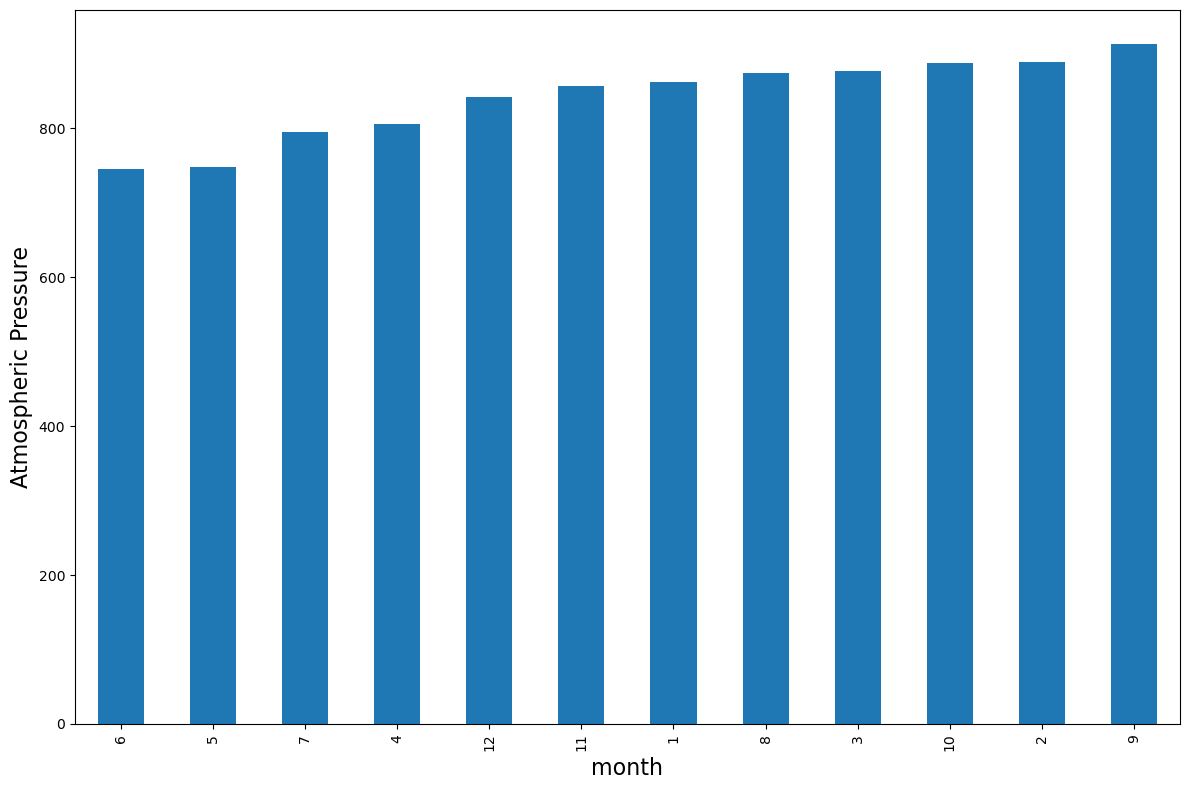

In [73]:
# Plot the average pressure by month
plt.figure(figsize=(12, 8))
ax = (
    avg_pressure_mars.sort_values(ascending=True)
    .plot(kind='bar')
)
plt.xticks(rotation=90)
plt.xlabel('month', fontsize=16)
plt.ylabel('Atmospheric Pressure', fontsize=16)
plt.tight_layout()
plt.savefig('./Outputs/avg_pressure_mars.png')
plt.show()

#### Observation and Analysis

This chart displays the average atmospheric pressure data sorted by month.

- The **lowest atmospheric pressure** occurs in the 5th and 6th months, with pressures in these two months significantly lower than those of other months.

- The **highest atmospheric pressure** is observed in the 9th month.

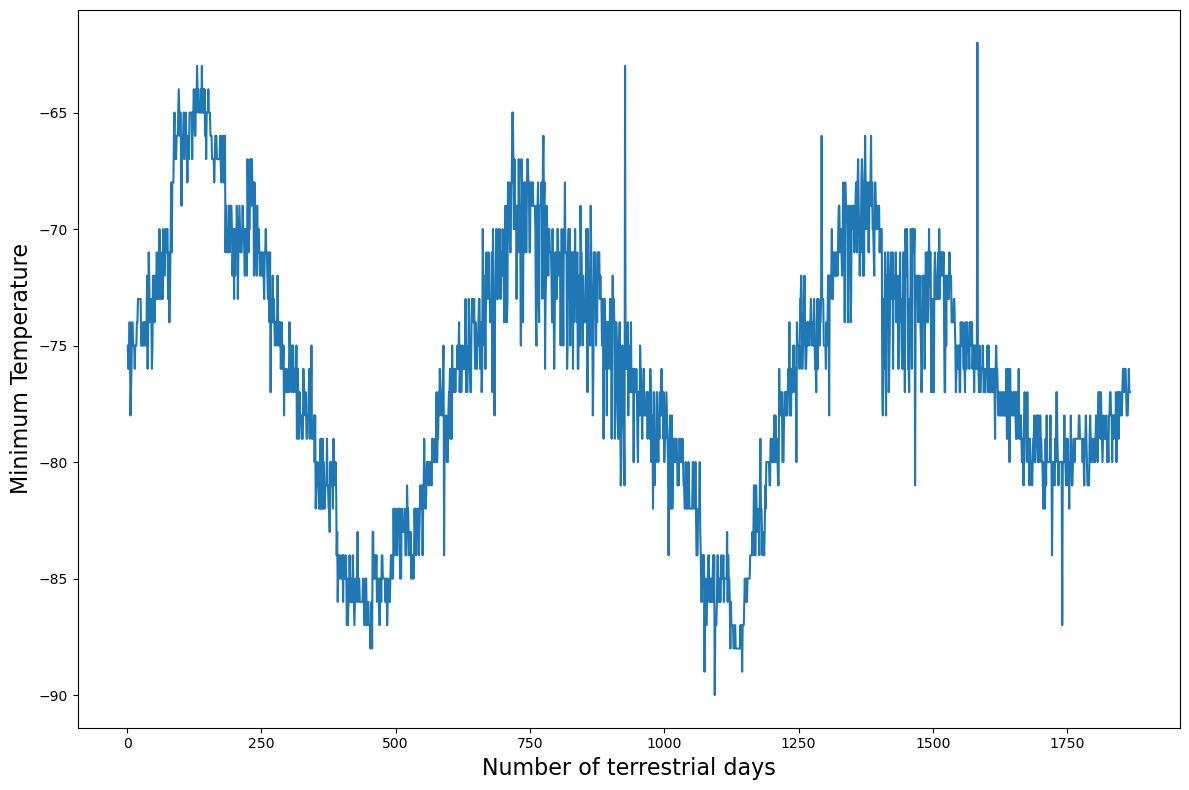

In [74]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Set earliest terrestrial day as  first day, use rank to calculate the number of terrestrial day.
df['number_of_terrestrial_days'] = (
    df['terrestrial_date']
    .rank(method='dense')
    .astype(int)
)

plt.figure(figsize=(12, 8))
plt.plot(df['number_of_terrestrial_days'], df['min_temp'])
plt.xlabel('Number of terrestrial days', fontsize=16)
plt.ylabel('Minimum Temperature', fontsize=16)
plt.tight_layout()
plt.savefig('./Outputs/number_of_terrestrial_days.png')
plt.show()

#### Observation and Analysis

This chart shows the trend of surface temperature changes on Mars over a period of time.

- **Periodic Fluctuations**: The minimum temperatures exhibit clear periodic fluctuations, indicating that the surface temperature of Mars varies regularly over time, possibly related to seasonal changes.
- **Temperature Range**: The minimum temperatures at different points in time are roughly between -65°C and -90°C. It can be observed that there are periods with higher temperatures (close to -65°C) and others with lower temperatures (close to -90°C).
- **Cycle Length**: The chart indicates that approximately every 750 days (Earth days) constitutes a complete cycle, with temperatures changing from one extreme to another and then back again. This is similar to the length of a Martian year (about 687 Earth days), suggesting that temperature fluctuations are related to Mars' orbital cycle.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [56]:
# Write the data to a CSV
output_file_path = './Outputs/mars_weather.csv'
df.to_csv(output_file_path, index=False)

In [57]:
# Quit your browsing session
browser.quit()